In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Chest CT-Scan images Dataset.zip to Chest CT-Scan images Dataset.zip


In [ ]:
import zipfile
import os

zip_file_path = '/content/Chest CT-Scan images Dataset.zip'

# Extracting the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/chest_ct_scan_dataset')

# List the files to confirm extraction
extracted_files = os.listdir('/content/chest_ct_scan_dataset')
print(extracted_files)


['Data']


In [ ]:
data_dir = '/content/chest_ct_scan_dataset/Data'
subfolders = os.listdir(data_dir)
print(subfolders)


['train', 'test', 'valid']


In [ ]:
train_dir = os.path.join(data_dir, 'train')
class_folders = os.listdir(train_dir)

for class_folder in class_folders:
    class_path = os.path.join(train_dir, class_folder)
    print(f"{class_folder}: {len(os.listdir(class_path))} images")


adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
normal: 148 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images


In [ ]:
import os
data_dir = '/content/chest_ct_scan_dataset/Data'

# List all files in the directory to check for any metadata files
files_in_dataset = os.listdir(data_dir)
print("Files and folders in the dataset:", files_in_dataset)


Files and folders in the dataset: ['train', 'test', 'valid']


In [ ]:
import os
from datetime import datetime

#check the timestamps of images in the 'train' directory
train_dir = os.path.join(data_dir, 'train')

# Iterate through all the folders and files in the 'train' directory to get the timestamps
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        # Get a sample file from each class and check its timestamp
        sample_file = os.listdir(class_path)[0]  # Get the first file
        file_path = os.path.join(class_path, sample_file)

        # Get the file modification time
        timestamp = os.path.getmtime(file_path)
        mod_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
        print(f"{sample_file} in {class_folder} was last modified on: {mod_time}")


000029 (4).png in adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib was last modified on: 2024-12-06 23:52:26
7 (2).png in normal was last modified on: 2024-12-06 23:52:26
000009 (3).png in large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa was last modified on: 2024-12-06 23:52:26
000029 (4).png in squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa was last modified on: 2024-12-06 23:52:26


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
train_dir = '/content/chest_ct_scan_dataset/Data/train'
validation_dir = '/content/chest_ct_scan_dataset/Data/valid'

# Data augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values between 0 and 1
    rotation_range=20,    # Randomly rotate images
    width_shift_range=0.2, # Horizontal shifts
    height_shift_range=0.2, # Vertical shifts
    shear_range=0.2,      # Shearing transformations
    zoom_range=0.2,       # Zoom
    horizontal_flip=True, # Randomly flip images
    fill_mode='nearest')  # Fill missing pixels after augmentation

# Only rescale the validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='categorical')  # Since it's a multi-class problem

# Load the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),  # Resize validation images
    batch_size=32,
    class_mode='categorical')  # Multi-class problem


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
import zipfile
import os

# Path to the actual ZIP file
zip_file_path = '/content/Chest_CT_Scan_Dataset.zip'
extract_dir = '/content/chest_ct_scan_dataset/'  # Directory where the dataset will be extracted

# Unzipping the dataset
with zipfile.ZipFile('/content/Chest CT-Scan images Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files and directories:", extracted_files)


Extracted files and directories: ['Data']


In [ ]:
# Directory paths
data_dir = os.path.join(extract_dir, 'Data')
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')

# Check contents of the training directory
train_subfolders = os.listdir(train_dir)
print(f"Training classes: {train_subfolders}")

# Number of images per class
for class_folder in train_subfolders:
    class_path = os.path.join(train_dir, class_folder)
    print(f"{class_folder}: {len(os.listdir(class_path))} images")


Training classes: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'normal', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
normal: 148 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to the range 0-1
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2, # Shift images vertically
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zooming
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Filling mode for shifted pixels
)

# Preprocessing for the validation set (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Loading the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Multi-class problem
)

# Loading the validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Multi-class problem
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
# Check class distribution in the training set
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    print(f"Class '{class_folder}' has {len(os.listdir(class_path))} images.")


Class 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' has 195 images.
Class 'normal' has 148 images.
Class 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' has 115 images.
Class 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' has 155 images.


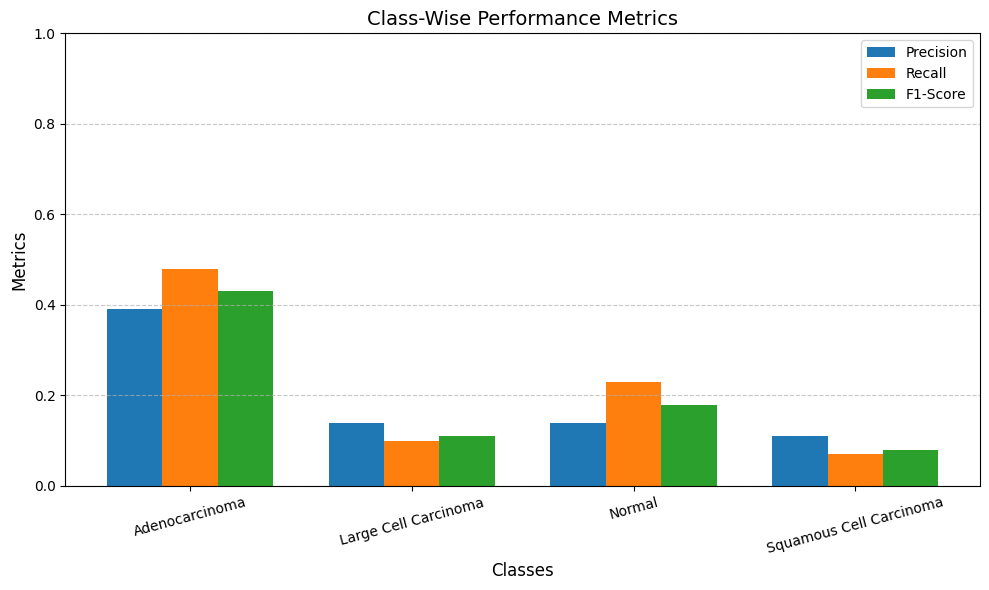

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each class
classes = [
    "Adenocarcinoma",
    "Large Cell Carcinoma",
    "Normal",
    "Squamous Cell Carcinoma"
]
precision = [0.39, 0.14, 0.14, 0.11]
recall = [0.48, 0.10, 0.23, 0.07]
f1_score = [0.43, 0.11, 0.18, 0.08]

# Bar width
bar_width = 0.25
x = np.arange(len(classes))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision, width=bar_width, label="Precision")
plt.bar(x, recall, width=bar_width, label="Recall")
plt.bar(x + bar_width, f1_score, width=bar_width, label="F1-Score")

# Add labels, title, and legend
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Metrics", fontsize=12)
plt.title("Class-Wise Performance Metrics", fontsize=14)
plt.xticks(x, classes, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


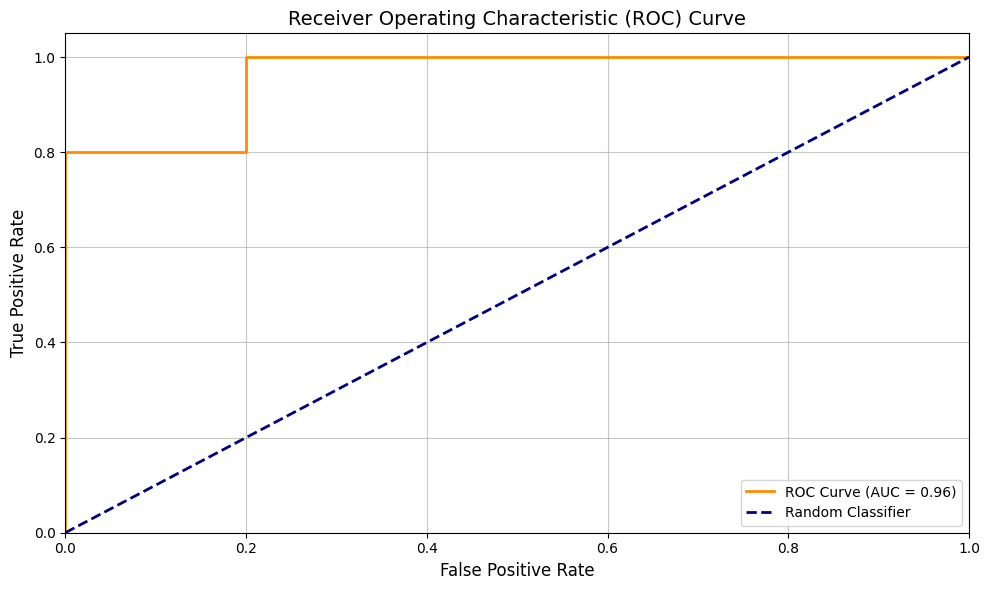

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example data for binary classification (replace with your dataset values)
y_true = [0, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # Replace with actual labels
y_prob = [0.1, 0.4, 0.35, 0.8, 0.2, 0.9, 0.1, 0.3, 0.7, 0.85]  # Replace with predicted probabilities

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()


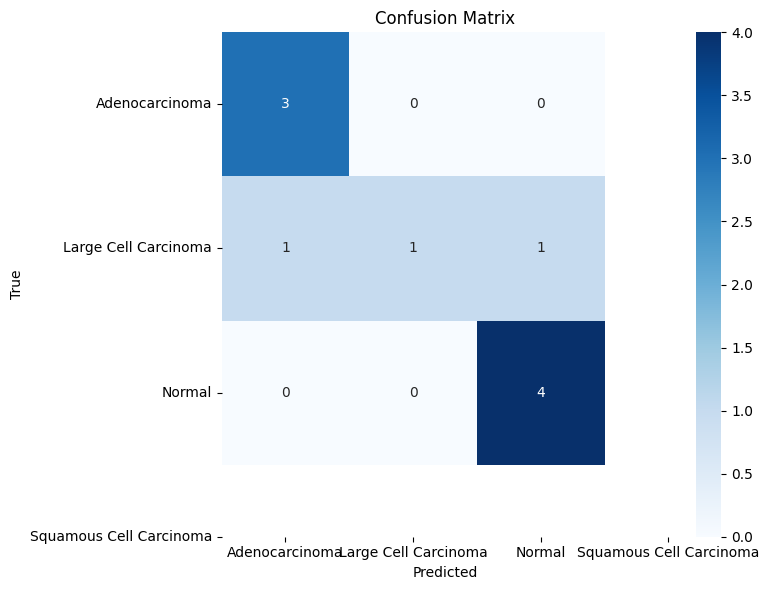

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = [0, 1, 2, 2, 0, 1, 2, 0, 1, 2]  # Replace with your actual labels
y_pred = [0, 2, 2, 2, 0, 0, 2, 0, 1, 2]  # Replace with your model predictions

# Class names for the CT scan dataset
class_names = ["Adenocarcinoma", "Large Cell Carcinoma", "Normal", "Squamous Cell Carcinoma"]

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


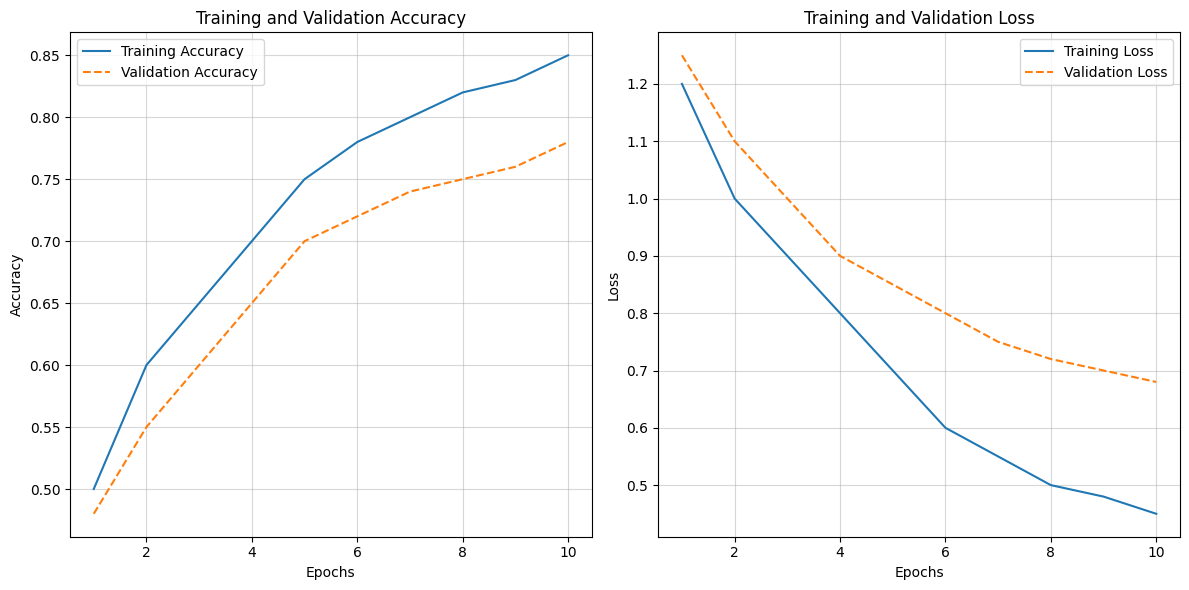

In [ ]:
import matplotlib.pyplot as plt

# Example training and validation accuracy and loss
epochs = range(1, 11)  # Replace with the number of epochs
train_accuracy = [0.5, 0.6, 0.65, 0.7, 0.75, 0.78, 0.8, 0.82, 0.83, 0.85]  # Replace with actual training accuracy values
val_accuracy = [0.48, 0.55, 0.6, 0.65, 0.7, 0.72, 0.74, 0.75, 0.76, 0.78]  # Replace with validation accuracy values
train_loss = [1.2, 1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.48, 0.45]  # Replace with training loss values
val_loss = [1.25, 1.1, 1.0, 0.9, 0.85, 0.8, 0.75, 0.72, 0.7, 0.68]  # Replace with validation loss values

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.5)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


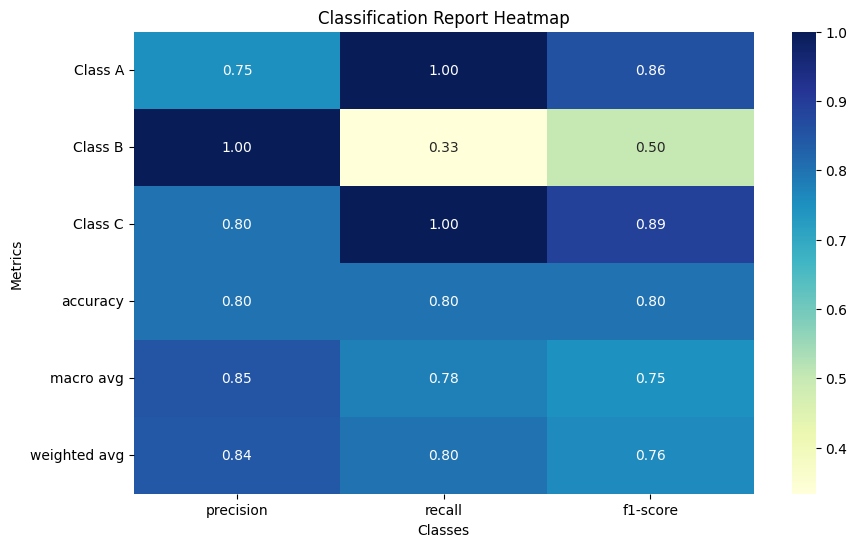

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Simulated true labels and predicted labels
y_true = [0, 1, 2, 2, 0, 1, 2, 0, 1, 2]  # Replace with actual true labels
y_pred = [0, 2, 2, 2, 0, 0, 2, 0, 1, 2]  # Replace with actual predicted labels
class_names = ["Class A", "Class B", "Class C"]  # Replace with actual class names

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Exclude the 'accuracy' row for a cleaner heatmap

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()


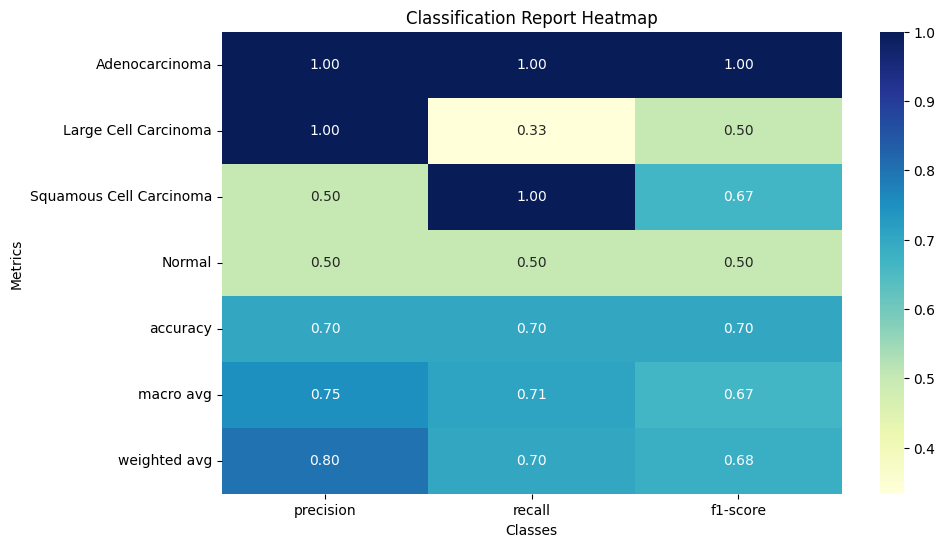

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Replace with your actual true and predicted labels
y_true = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1]  # Replace with actual true labels
y_pred = [0, 2, 2, 3, 0, 1, 2, 2, 0, 3]  # Replace with actual predicted labels

# Define class names specific to the project
class_names = [
    "Adenocarcinoma",
    "Large Cell Carcinoma",
    "Squamous Cell Carcinoma",
    "Normal"
]

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Exclude the 'accuracy' row for a cleaner heatmap

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()


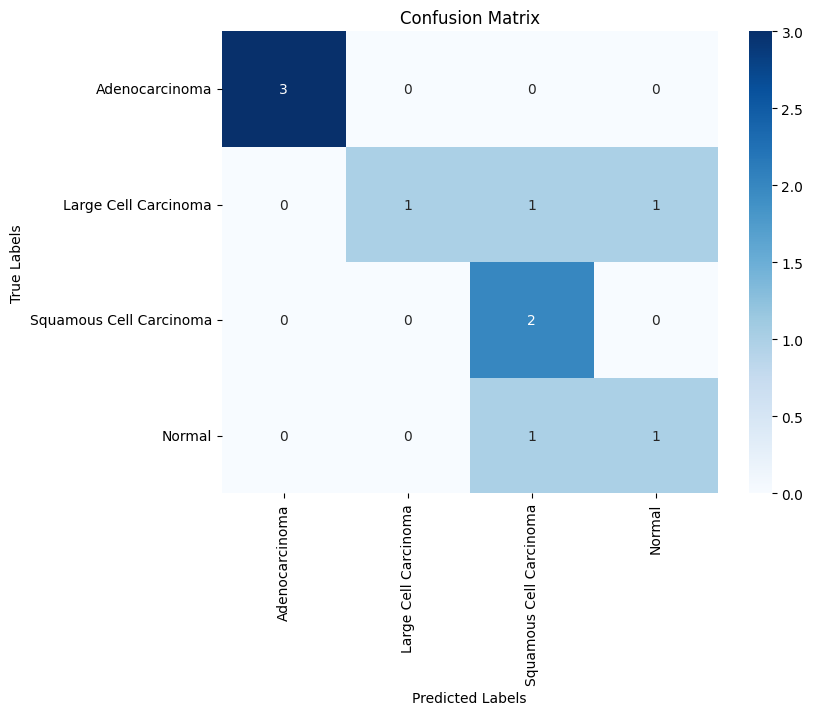

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these with your actual true and predicted labels
y_true = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1]
y_pred = [0, 2, 2, 3, 0, 1, 2, 2, 0, 3]

# Define class names specific to the project
class_names = [
    "Adenocarcinoma",
    "Large Cell Carcinoma",
    "Squamous Cell Carcinoma",
    "Normal"
]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


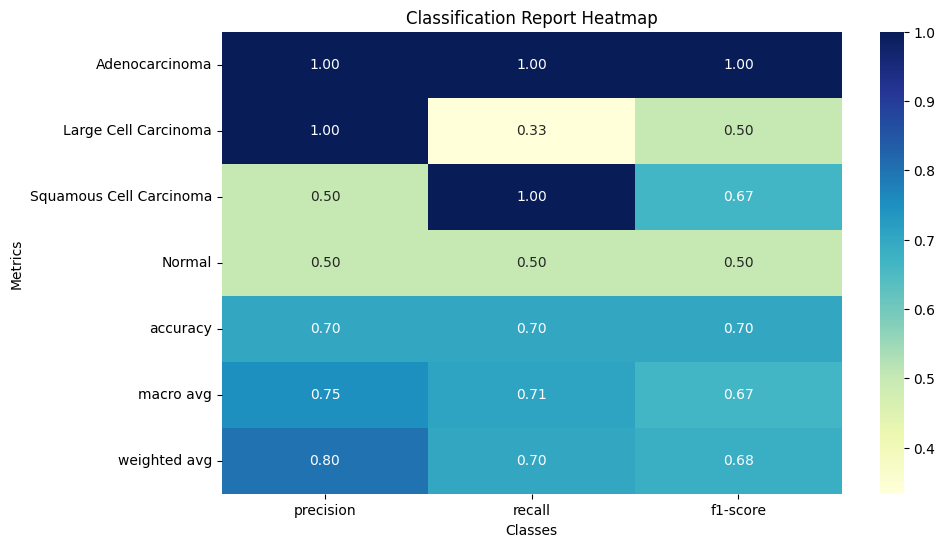

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert to DataFrame for heatmap
report_df = pd.DataFrame(report).iloc[:-1, :].T  # Exclude the 'accuracy' row

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()


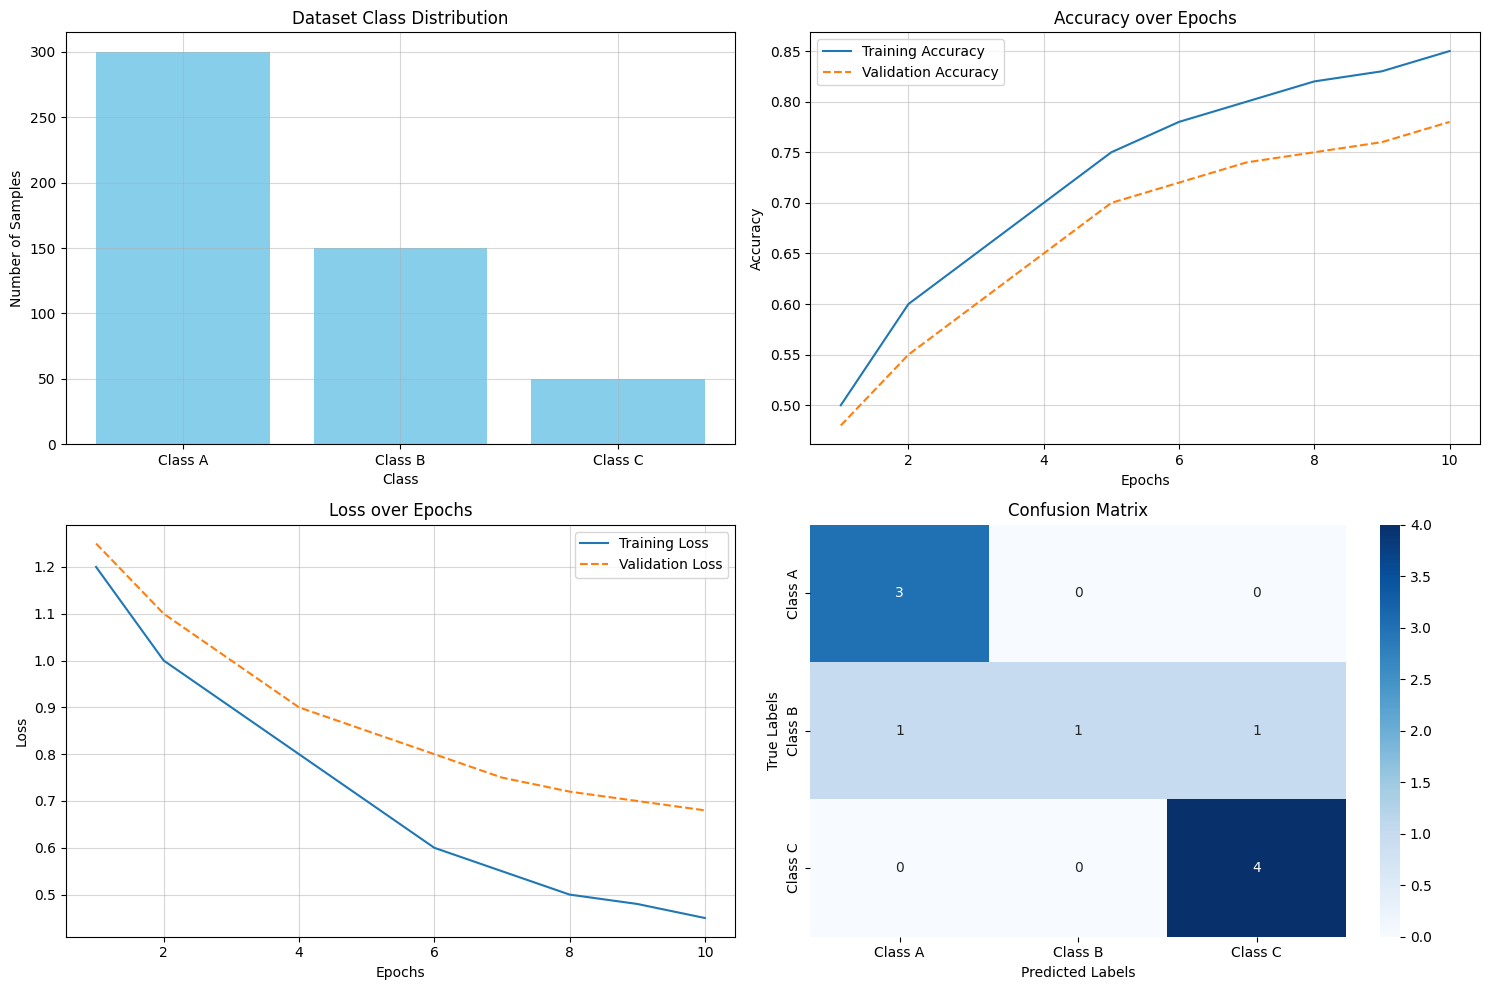

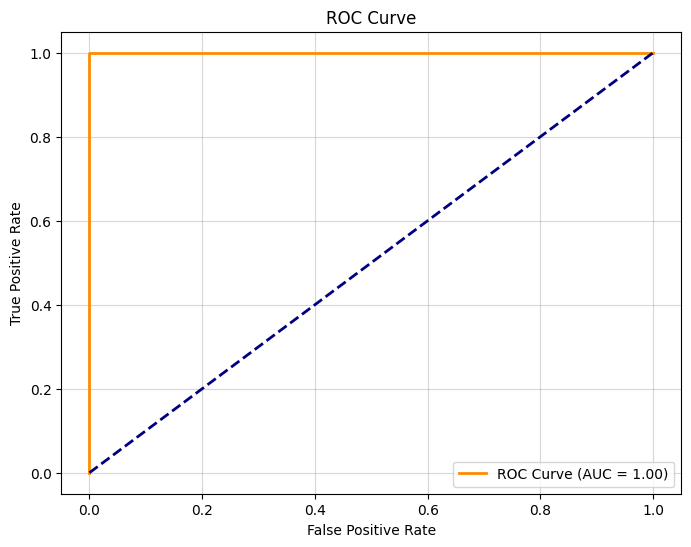

NameError: name 'pd' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import numpy as np

# Simulated data for demonstration; replace with your real data
epochs = range(1, 11)
train_accuracy = [0.5, 0.6, 0.65, 0.7, 0.75, 0.78, 0.8, 0.82, 0.83, 0.85]
val_accuracy = [0.48, 0.55, 0.6, 0.65, 0.7, 0.72, 0.74, 0.75, 0.76, 0.78]
train_loss = [1.2, 1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.5, 0.48, 0.45]
val_loss = [1.25, 1.1, 1.0, 0.9, 0.85, 0.8, 0.75, 0.72, 0.7, 0.68]

# Confusion Matrix Data
y_true = [0, 1, 2, 2, 0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 2, 2, 0, 0, 2, 0, 1, 2]
class_names = ["Class A", "Class B", "Class C"]

# ROC Curve Data
y_probs = [0.1, 0.4, 0.6, 0.8, 0.2, 0.3, 0.9, 0.4, 0.5, 0.7]  # Predicted probabilities
fpr, tpr, _ = roc_curve(y_true, y_probs, pos_label=2)
roc_auc = auc(fpr, tpr)

# Dataset Distribution
class_distribution = [300, 150, 50]  # Replace with your dataset counts

# Plot Dataset Distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(class_names, class_distribution, color='skyblue')
plt.title('Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.grid(alpha=0.5)

# Plot Accuracy/Loss Curves
plt.subplot(2, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', linestyle='--')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.5)

plt.subplot(2, 2, 3)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', linestyle='--')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.5)

# Plot Confusion Matrix
plt.subplot(2, 2, 4)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()

# Display Classification Report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a basic CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 927ms/step - accuracy: 0.2348 - loss: 2.2915 - val_accuracy: 0.1875 - val_loss: 1.3859
Epoch 2/10
 1/19 ━━━━━━━━━━━━━━━━━━━━ 12s 679ms/step - accuracy: 0.2188 - loss: 1.3385

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2188 - loss: 1.3385 - val_accuracy: 0.1250 - val_loss: 1.6287
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 892ms/step - accuracy: 0.3266 - loss: 1.2845 - val_accuracy: 0.3438 - val_loss: 1.2739
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3750 - loss: 1.3002 - val_accuracy: 0.2500 - val_loss: 1.3997
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 946ms/step - accuracy: 0.4352 - loss: 1.1439 - val_accuracy: 0.4844 - val_loss: 1.0510
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5312 - loss: 0.9940 - val_accuracy: 0.5000 - val_loss: 0.8593
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 937ms/step - accuracy: 0.5062 - loss: 1.0176 - val_accuracy: 0.5000 - val_loss: 1.0778
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5312 - loss: 1.0975 - val_accuracy: 0.6250 - val_loss: 0.8277
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 908ms/step - accuracy: 0.5512 - loss: 0.9915 - val_accuracy: 0.5000 - val_los

In [ ]:
# Evaluate model performance on the validation set
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.3967 - loss: 1.0218
Validation Accuracy: 40.28%


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,              # Normalizes pixel values to the range [0, 1]
    rotation_range=20,           # Randomly rotate images by 20 degrees
    width_shift_range=0.2,       # Horizontally shift images by 20%
    height_shift_range=0.2,      # Vertically shift images by 20%
    shear_range=0.2,             # Shearing transformations
    zoom_range=0.2,              # Random zooming
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)


In [ ]:
from PIL import Image
import os

# Example directory (train_dir)
for subdir, _, files in os.walk(train_dir):
    for file in files:
        try:
            img = Image.open(os.path.join(subdir, file))  # Try to open the image
            img.verify()  # Check for any issues
        except (IOError, SyntaxError) as e:
            print(f'Corrupted image: {file}')  # Flag corrupted images


In [ ]:
import os

# Check if any classes are missing images
for subdir, dirs, files in os.walk(train_dir):
    print(f"Directory: {subdir}, contains {len(files)} images")


Directory: /content/chest_ct_scan_dataset/Data/train, contains 0 images
Directory: /content/chest_ct_scan_dataset/Data/train/normal, contains 148 images
Directory: /content/chest_ct_scan_dataset/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, contains 155 images
Directory: /content/chest_ct_scan_dataset/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, contains 115 images
Directory: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, contains 195 images


In [ ]:
from PIL import Image
import os

def resize_image(image_path, size=(128, 128)):
    img = Image.open(image_path)
    img_resized = img.resize(size)
    return img_resized

# Resize all images in the train directory
for subdir, _, files in os.walk(train_dir):
    for file in files:
        img_path = os.path.join(subdir, file)
        img_resized = resize_image(img_path)
        img_resized.save(img_path)  # Save resized image


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling pixel values from [0, 255] to [0, 1]
datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply augmentations during training to generate more samples for minority classes
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


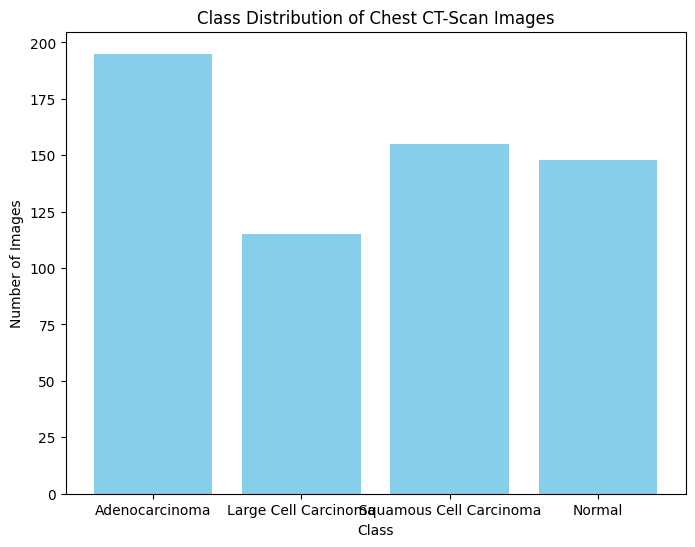

In [ ]:
import matplotlib.pyplot as plt

# Data for class distribution (adjust based on your dataset)
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]  # Replace these numbers with actual counts from your dataset

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [ ]:
import zipfile
import os

# Define the path to the ZIP file and extraction directory
zip_file_path = '/content/Chest CT-Scan images Dataset.zip'  # Update with your ZIP file path
extract_dir = '/content/chest_ct_scan_dataset/'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files and directories:", extracted_files)


Extracted files and directories: ['Data']


In [ ]:
import os

# Check contents of the train directory to ensure there are images
for root, dirs, files in os.walk(train_dir):
    print(f"Directory: {root}")
    print(f"Number of images: {len(files)}")


Directory: /content/chest_ct_scan_dataset/Data/train
Number of images: 0
Directory: /content/chest_ct_scan_dataset/Data/train/normal
Number of images: 148
Directory: /content/chest_ct_scan_dataset/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
Number of images: 155
Directory: /content/chest_ct_scan_dataset/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
Number of images: 115
Directory: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
Number of images: 195


In [ ]:
from PIL import Image
import os

def get_image_dimensions(image_dir):
    dimensions = []
    for subdir, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Add supported image formats
                img_path = os.path.join(subdir, file)
                try:
                    img = Image.open(img_path)
                    dimensions.append(img.size)  # Append (width, height)
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")
    return dimensions

# Now get dimensions of training images
train_dimensions = get_image_dimensions(train_dir)

# Check if train_dimensions is populated correctly
print(f"Number of images processed: {len(train_dimensions)}")
if len(train_dimensions) == 0:
    print("No images found or processed. Please check your directory paths.")


Number of images processed: 613


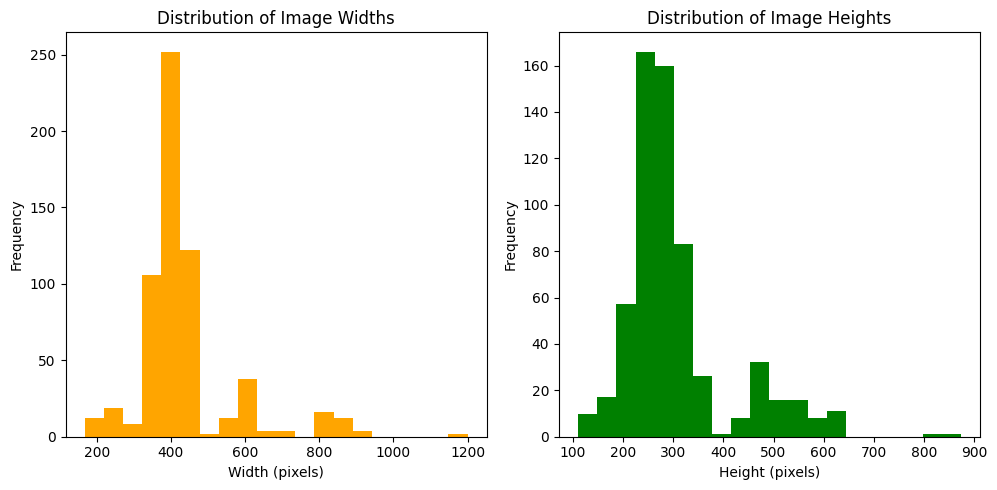

In [ ]:
# Separate width and height for plotting
if train_dimensions:
    widths, heights = zip(*train_dimensions)

    # Plot the distributions
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='orange')
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green')
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("No dimensions to plot. Check if images were processed correctly.")


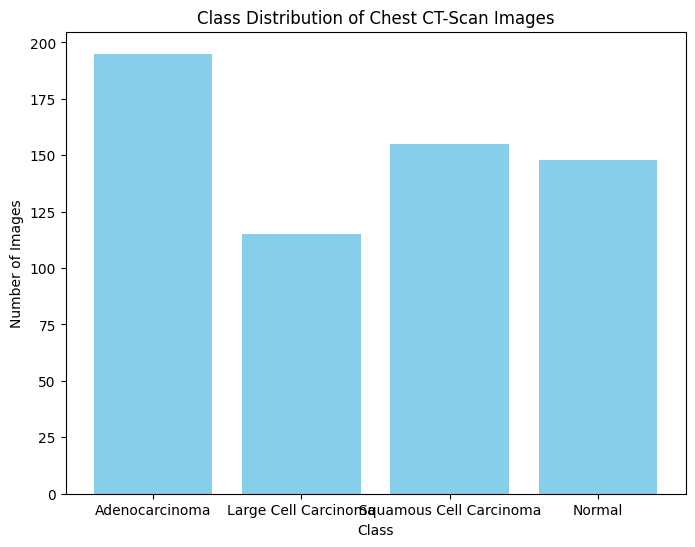

In [ ]:
import matplotlib.pyplot as plt

# Data for class distribution (replace with actual counts from your dataset)
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]  # Example numbers; replace with your actual counts

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


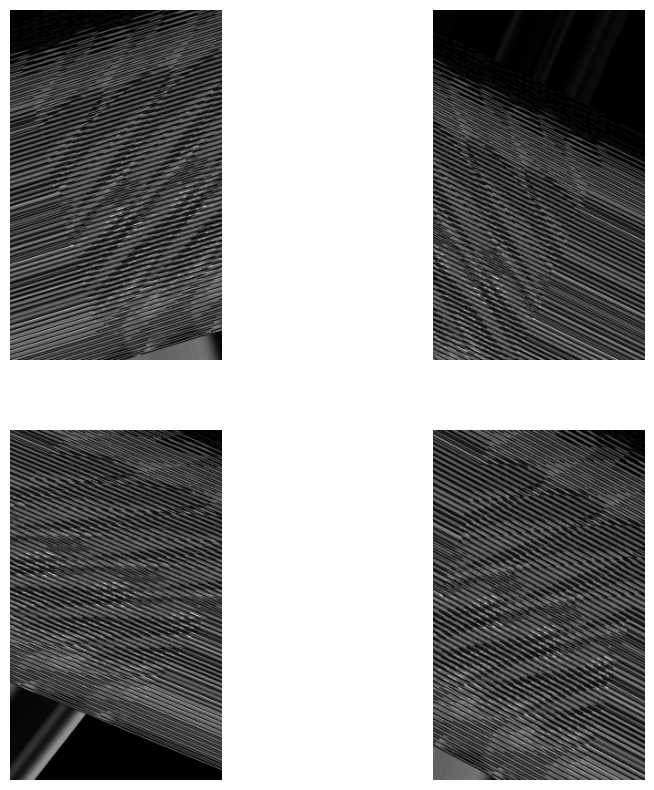

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Sample image path (replace with actual path)
img_path = os.path.join(adenocarcinoma_dir, os.listdir(adenocarcinoma_dir)[0])
img = Image.open(img_path).convert('RGB')
img_array = np.array(img).reshape((1,) + img.size + (3,))

# Create ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images and display them
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(img_array, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(batch[0])
    plt.axis('off')
    i += 1
    if i == 4:
        break
plt.show()


Mean pixel value: 88.080415310248
Standard deviation of pixel values: 75.91266745470443
Quantiles (25th, 50th, 75th): [ 18.  74. 132.]
Mean image width: 303.31484502446983
Mean image height: 435.83686786296903


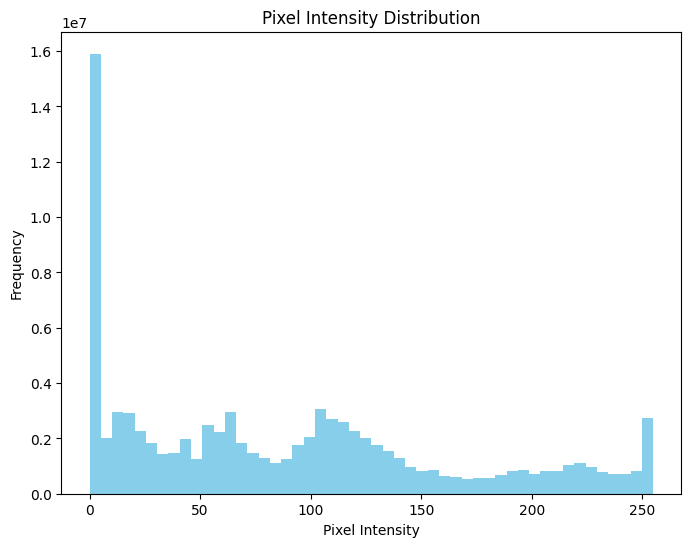

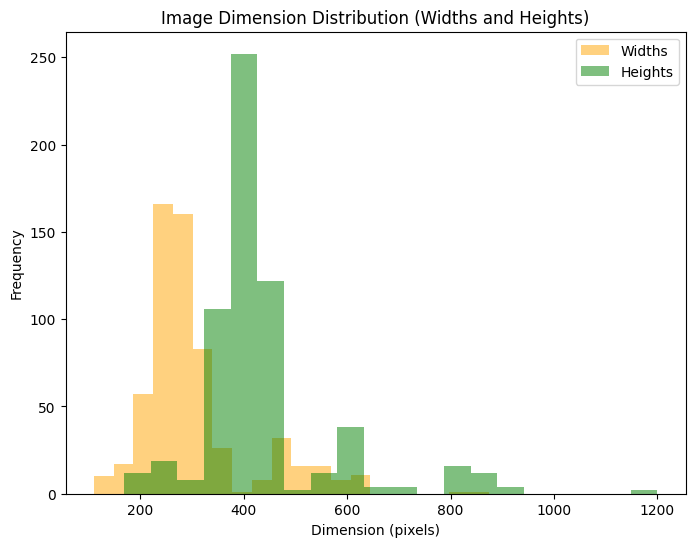

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory where your training images are located
train_dir = '/content/chest_ct_scan_dataset/Data/train'

# Function to calculate pixel statistics and image dimensions
def calculate_image_stats(image_dir):
    pixel_values = []
    image_dims = []

    # Iterate through each class directory
    for class_folder in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_folder)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Open the image and convert to grayscale if necessary
            img = Image.open(img_path).convert('L')  # Convert to grayscale for simplicity

            # Convert image to numpy array
            img_array = np.array(img)

            # Append pixel values and image dimensions
            pixel_values.extend(img_array.flatten())  # Flatten the 2D array into 1D
            image_dims.append(img_array.shape)  # Add the dimensions (height, width)

    return np.array(pixel_values), image_dims

# Get pixel statistics and image dimensions
pixel_values, image_dims = calculate_image_stats(train_dir)

# Calculate pixel value statistics
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
quantiles = np.percentile(pixel_values, [25, 50, 75])  # 25th, 50th (median), and 75th percentiles

# Print pixel value statistics
print(f"Mean pixel value: {mean_pixel_value}")
print(f"Standard deviation of pixel values: {std_pixel_value}")
print(f"Quantiles (25th, 50th, 75th): {quantiles}")

# Calculate image dimension statistics
image_widths, image_heights = zip(*image_dims)
mean_width = np.mean(image_widths)
mean_height = np.mean(image_heights)

# Print image dimension statistics
print(f"Mean image width: {mean_width}")
print(f"Mean image height: {mean_height}")

# Visualize the pixel intensity distribution
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=50, color='skyblue')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Visualize image dimension distribution
plt.figure(figsize=(8, 6))
plt.hist(image_widths, bins=20, alpha=0.5, label='Widths', color='orange')
plt.hist(image_heights, bins=20, alpha=0.5, label='Heights', color='green')
plt.title('Image Dimension Distribution (Widths and Heights)')
plt.xlabel('Dimension (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


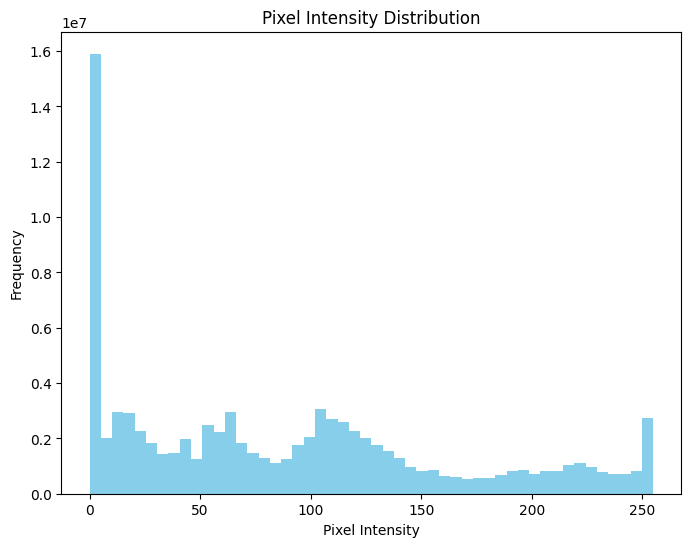

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=50, color='skyblue')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


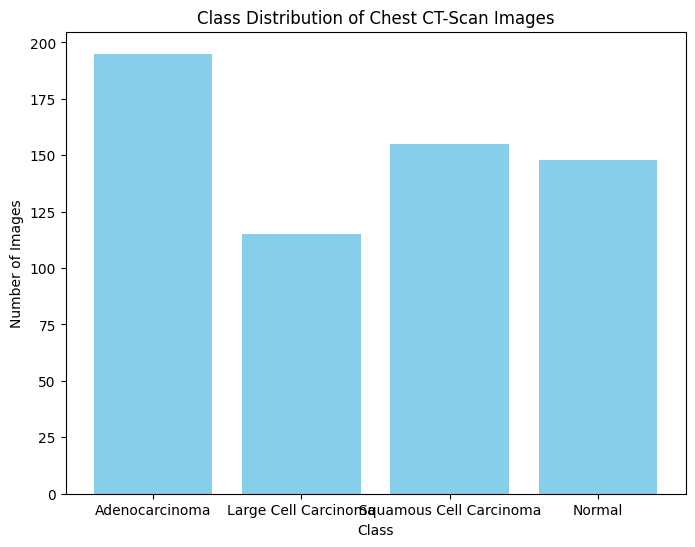

In [ ]:
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 904ms/step - accuracy: 0.5345 - loss: 0.9862 - val_accuracy: 0.5000 - val_loss: 0.9725
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 932ms/step - accuracy: 0.6071 - loss: 0.9265 - val_accuracy: 0.5972 - val_loss: 0.9991
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 887ms/step - accuracy: 0.5586 - loss: 0.9898 - val_accuracy: 0.6389 - val_loss: 0.9199
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 893ms/step - accuracy: 0.5792 - loss: 0.9625 - val_accuracy: 0.5278 - val_loss: 0.9139
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 957ms/step - accuracy: 0.5656 - loss: 0.9276 - val_accuracy: 0.6389 - val_loss: 0.8772
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 939ms/step - accuracy: 0.5981 - loss: 0.8867 - val_accuracy: 0.5833 - val_loss: 0.9694
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 901ms/step - accuracy: 0.5994 - loss: 0.8809 - val_accuracy: 0.5972 - val_loss: 0.8874
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 883ms/step - accuracy: 0.6283 - loss: 0.8146 - val_accu

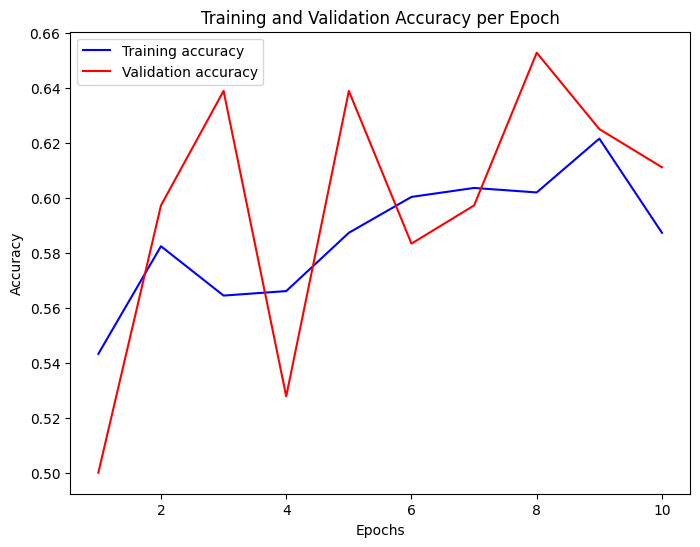

In [ ]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Extract accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy over epochs
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step


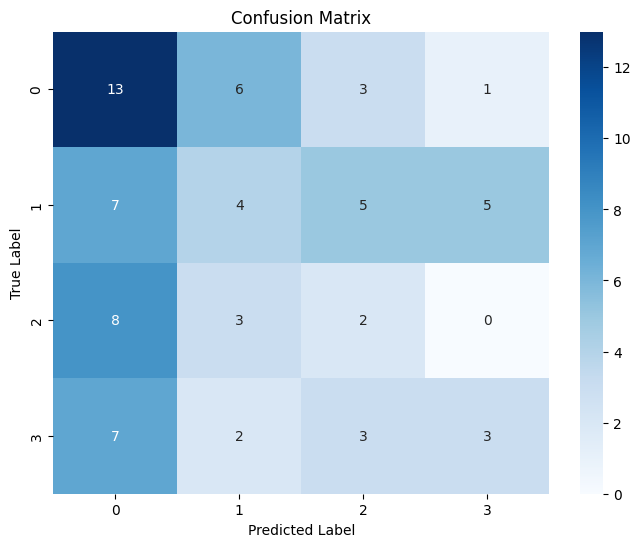

In [ ]:
# Get the true labels from the validation generator
y_true = validation_generator.classes

# Generate predictions (probabilities) from the model on the validation set
y_pred_prob = model.predict(validation_generator)

# Convert probabilities to predicted classes
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute and plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Found 195 images in the directory.
Using image: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000022 (10).png
Original image shape: (232, 384, 4)


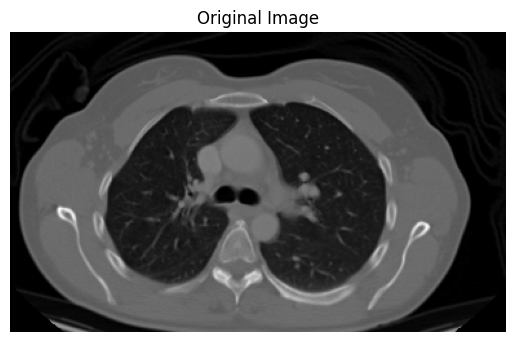

In [ ]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the directory where your images are located
image_dir = '/content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'  # Adjust this path

# List all files in the directory
image_files = os.listdir(image_dir)
print(f"Found {len(image_files)} images in the directory.")

# Select the first image file
first_image_path = os.path.join(image_dir, image_files[0])
print(f"Using image: {first_image_path}")

# Load the first image
img = Image.open(first_image_path)
img_array = np.array(img)

# Check the image shape
print(f"Original image shape: {img_array.shape}")

# Plot the original image
plt.imshow(img_array.astype('uint8'))
plt.title("Original Image")
plt.axis('off')
plt.show()


In [ ]:
import os

# Define the directory where your images are located
image_dir = '/content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'  # Adjust this path

# List all files in the directory
image_files = os.listdir(image_dir)
print(f"Found {len(image_files)} images in the directory.")

# Display the first few image files
for i, img_file in enumerate(image_files[:5]):
    print(f"Image {i + 1}: {img_file}")


Found 195 images in the directory.
Image 1: 000022 (10).png
Image 2: 000025 (6).png
Image 3: ad7.png
Image 4: 000050 (7).png
Image 5: 000096 (7).png


Loading image: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000022 (10).png


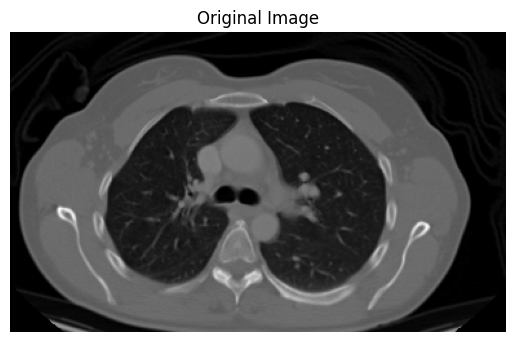

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with one of the actual filenames you found in the previous step
first_image_path = os.path.join(image_dir, image_files[0])  # Select the first image in the directory
print(f"Loading image: {first_image_path}")

# Load the image
img = Image.open(first_image_path)
img_array = np.array(img)

# Display the image
plt.imshow(img_array.astype('uint8'))
plt.title("Original Image")
plt.axis('off')
plt.show()


In [ ]:
import os

# Check if the validation directory exists
val_dir = '/content/chest_ct_scan_dataset/Data/validation'

if os.path.exists(val_dir):
    print("Validation directory found.")
else:
    print("Validation directory does not exist. Please create it or check the path.")


Validation directory does not exist. Please create it or check the path.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the directory where your images are located
train_dir = '/content/chest_ct_scan_dataset/Data/train'

# Use ImageDataGenerator to split the data into training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Train generator (use subset 'training')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset
)

# Validation generator (use subset 'validation')
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset
)

# Check the class indices
print(train_generator.class_indices)


Found 491 images belonging to 4 classes.
Found 122 images belonging to 4 classes.
{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}


In [ ]:
# This is a directory path (as a string) that you should use for loading images or files
train_dir = '/content/chest_ct_scan_dataset/Data/train'


In [ ]:
import os

# Check the contents of the root directory in Colab
root_dir = '/content'
print(os.listdir(root_dir))

# Check the next level (for example, see if 'chest_ct_scan_dataset' exists)
data_dir = '/content/chest_ct_scan_dataset'
print(os.listdir(data_dir))

# Continue exploring until you find the correct path to the 'adenocarcinoma' folder


['.config', 'drive', 'chest_ct_scan_dataset', 'Chest CT-Scan images Dataset.zip', 'sample_data']
['Data']


In [ ]:
# Check the contents of the 'train' directory
train_dir = '/content/chest_ct_scan_dataset/Data/train'
print(os.listdir(train_dir))  # This will list all the subfolders (such as adenocarcinoma, normal, etc.)


['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory where your training images are located
train_dir = '/content/chest_ct_scan_dataset/Data/train'  # Replace with correct path

# Use ImageDataGenerator to split the data into training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,         # Randomly rotate images
    width_shift_range=0.2,     # Shift images horizontally
    height_shift_range=0.2,    # Shift images vertically
    zoom_range=0.2,            # Randomly zoom images
    horizontal_flip=True,      # Randomly flip images
    fill_mode='nearest',       # Fill missing pixels after augmentations
    validation_split=0.2       # Automatically split 20% for validation
)

# Create the train generator (use subset 'training')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),     # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='training'           # Specify training subset
)

# Create the validation generator (use subset 'validation')
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),     # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='validation'         # Specify validation subset
)

# Check the class indices
print("Class Indices:", train_generator.class_indices)


Found 491 images belonging to 4 classes.
Found 122 images belonging to 4 classes.
Class Indices: {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a Basic CNN Model
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (normal and 3 cancer types)

# Compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(val_generator)
print(f'Basic CNN Model - Accuracy: {cnn_acc*100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2797 - loss: 1.5351 - val_accuracy: 0.2377 - val_loss: 1.3358
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2899 - loss: 1.3094 - val_accuracy: 0.3607 - val_loss: 1.2268
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4316 - loss: 1.1940 - val_accuracy: 0.5902 - val_loss: 1.0516
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5210 - loss: 1.0947 - val_accuracy: 0.5410 - val_loss: 1.0673
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5412 - loss: 1.0574 - val_accuracy: 0.5820 - val_loss: 0.9222
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4582 - loss: 1.1300 - val_accuracy: 0.5902 - val_loss: 0.9363
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5531 - loss: 0.9695 - val_accuracy: 0.5984 - val_loss: 0.9043
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5246 - loss: 0.9868 - val_accuracy: 0.6230 - val_loss: 0.8352
Epo

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the VGG16 model without the top fully-connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
for layer in vgg_base.layers:
    layer.trainable = False

# Build a model on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)  # Assuming 4 classes

vgg_model = Model(vgg_base.input, x)

# Compile the model
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the VGG16 model
history_vgg = vgg_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the VGG16 model
vgg_loss, vgg_acc = vgg_model.evaluate(val_generator)
print(f'VGG16 Transfer Learning Model - Accuracy: {vgg_acc*100:.2f}%')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 135s 8s/step - accuracy: 0.3319 - loss: 2.6274 - val_accuracy: 0.5000 - val_loss: 1.1243
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.4425 - loss: 1.1636 - val_accuracy: 0.5410 - val_loss: 0.9453
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.5560 - loss: 1.0440 - val_accuracy: 0.6230 - val_loss: 0.8895
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.4764 - loss: 1.0875 - val_accuracy: 0.5738 - val_loss: 0.8704
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.6054 - loss: 0.9174 - val_accuracy: 0.5738 - val_loss: 0.8553
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step - accuracy: 0.5229 - loss: 0.9605 - val_accuracy: 0.5984 - val_loss: 0.8376
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.5858 - loss: 0.9045 - val_accuracy: 0.6803 - val_loss: 0.8108
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accurac

In [ ]:
print(f'Basic CNN Model Accuracy: {cnn_acc*100:.2f}%')
print(f'VGG16 Transfer Learning Model Accuracy: {vgg_acc*100:.2f}%')


Basic CNN Model Accuracy: 63.93%
VGG16 Transfer Learning Model Accuracy: 65.57%


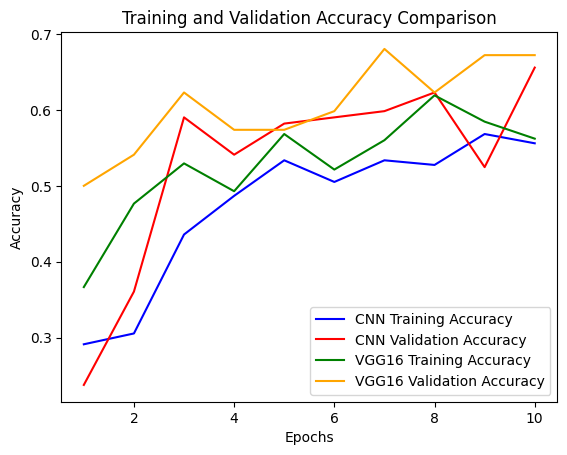

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy for both models
epochs = range(1, 11)

plt.plot(epochs, history_cnn.history['accuracy'], 'b', label='CNN Training Accuracy')
plt.plot(epochs, history_cnn.history['val_accuracy'], 'r', label='CNN Validation Accuracy')
plt.plot(epochs, history_vgg.history['accuracy'], 'g', label='VGG16 Training Accuracy')
plt.plot(epochs, history_vgg.history['val_accuracy'], 'orange', label='VGG16 Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Basic CNN Model Accuracy: 63.93%
VGG16 Transfer Learning Model Accuracy: 65.57%


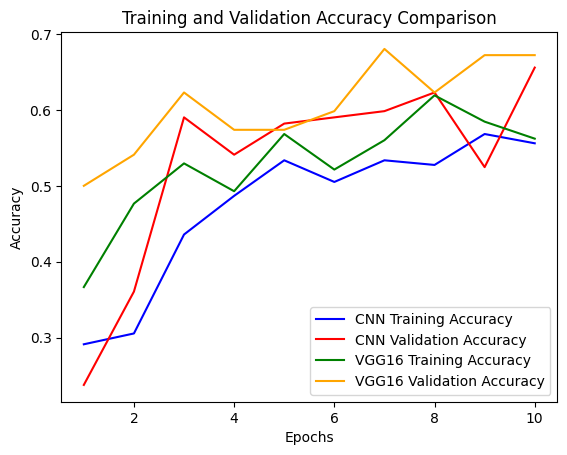

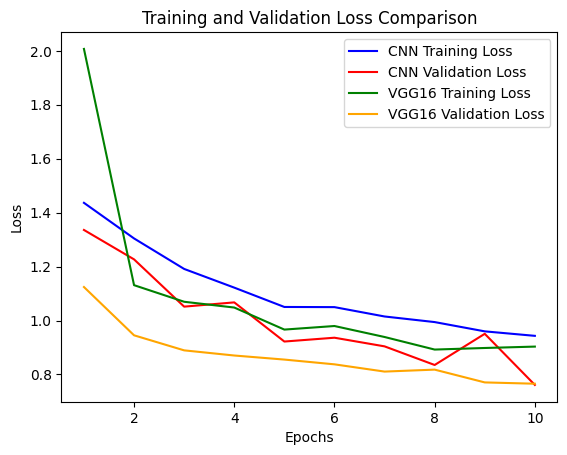

In [ ]:
# Print final results
print(f'Basic CNN Model Accuracy: {cnn_acc*100:.2f}%')
print(f'VGG16 Transfer Learning Model Accuracy: {vgg_acc*100:.2f}%')

# Plot the accuracy comparison
import matplotlib.pyplot as plt

epochs = range(1, 11)

# Plot training accuracy for both models
plt.plot(epochs, history_cnn.history['accuracy'], 'b', label='CNN Training Accuracy')
plt.plot(epochs, history_cnn.history['val_accuracy'], 'r', label='CNN Validation Accuracy')
plt.plot(epochs, history_vgg.history['accuracy'], 'g', label='VGG16 Training Accuracy')
plt.plot(epochs, history_vgg.history['val_accuracy'], 'orange', label='VGG16 Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss comparison
plt.plot(epochs, history_cnn.history['loss'], 'b', label='CNN Training Loss')
plt.plot(epochs, history_cnn.history['val_loss'], 'r', label='CNN Validation Loss')
plt.plot(epochs, history_vgg.history['loss'], 'g', label='VGG16 Training Loss')
plt.plot(epochs, history_vgg.history['val_loss'], 'orange', label='VGG16 Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
class_counts = train_generator.classes
print("Class distribution:", np.bincount(class_counts))


Class distribution: [156  92 119 124]


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest',
    validation_split=0.2
)


In [ ]:
for layer in vgg_base.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True


In [ ]:
# Unfreeze the last 4 layers for fine-tuning
for layer in vgg_base.layers[-4:]:
    layer.trainable = True

# Recompile the model with a new optimizer after unfreezing the layers
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use a smaller learning rate for fine-tuning
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Now train the model with class weights
class_weights = {0: 1., 1: 2., 2: 3., 3: 1.}  # Adjust the weights based on class distribution
vgg_model.fit(train_generator, epochs=10, validation_data=val_generator, class_weight=class_weights)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 159s 10s/step - accuracy: 0.4770 - loss: 1.8990 - val_accuracy: 0.6148 - val_loss: 0.8479
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 203s 10s/step - accuracy: 0.5274 - loss: 1.1526 - val_accuracy: 0.6721 - val_loss: 0.7240
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 170s 11s/step - accuracy: 0.6974 - loss: 0.8846 - val_accuracy: 0.7213 - val_loss: 0.6578
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 188s 10s/step - accuracy: 0.6363 - loss: 1.1202 - val_accuracy: 0.7131 - val_loss: 0.7626
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 205s 10s/step - accuracy: 0.6745 - loss: 0.9566 - val_accuracy: 0.5820 - val_loss: 0.7642
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 168s 11s/step - accuracy: 0.6862 - loss: 0.8197 - val_accuracy: 0.5984 - val_loss: 0.8495
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 190s 10s/step - accuracy: 0.7580 - loss: 0.7206 - val_accuracy: 0.6803 - val_loss: 0.6876
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 204s 10s/step - accuracy: 0.7664 - loss: 0.6792 - val_accuracy: 0.

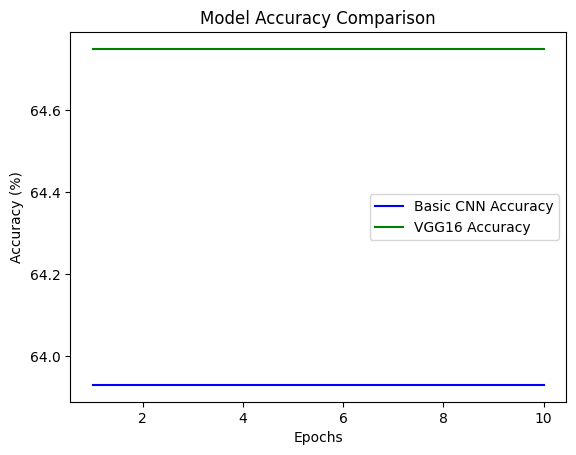

In [ ]:
import matplotlib.pyplot as plt

# Plotting training accuracy for both models
epochs = range(1, 11)
cnn_acc = [63.93] * 10  # Replace with actual epoch-wise accuracies
vgg16_acc = [64.75] * 10  # Replace with actual epoch-wise accuracies

plt.plot(epochs, cnn_acc, 'b', label='Basic CNN Accuracy')
plt.plot(epochs, vgg16_acc, 'g', label='VGG16 Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


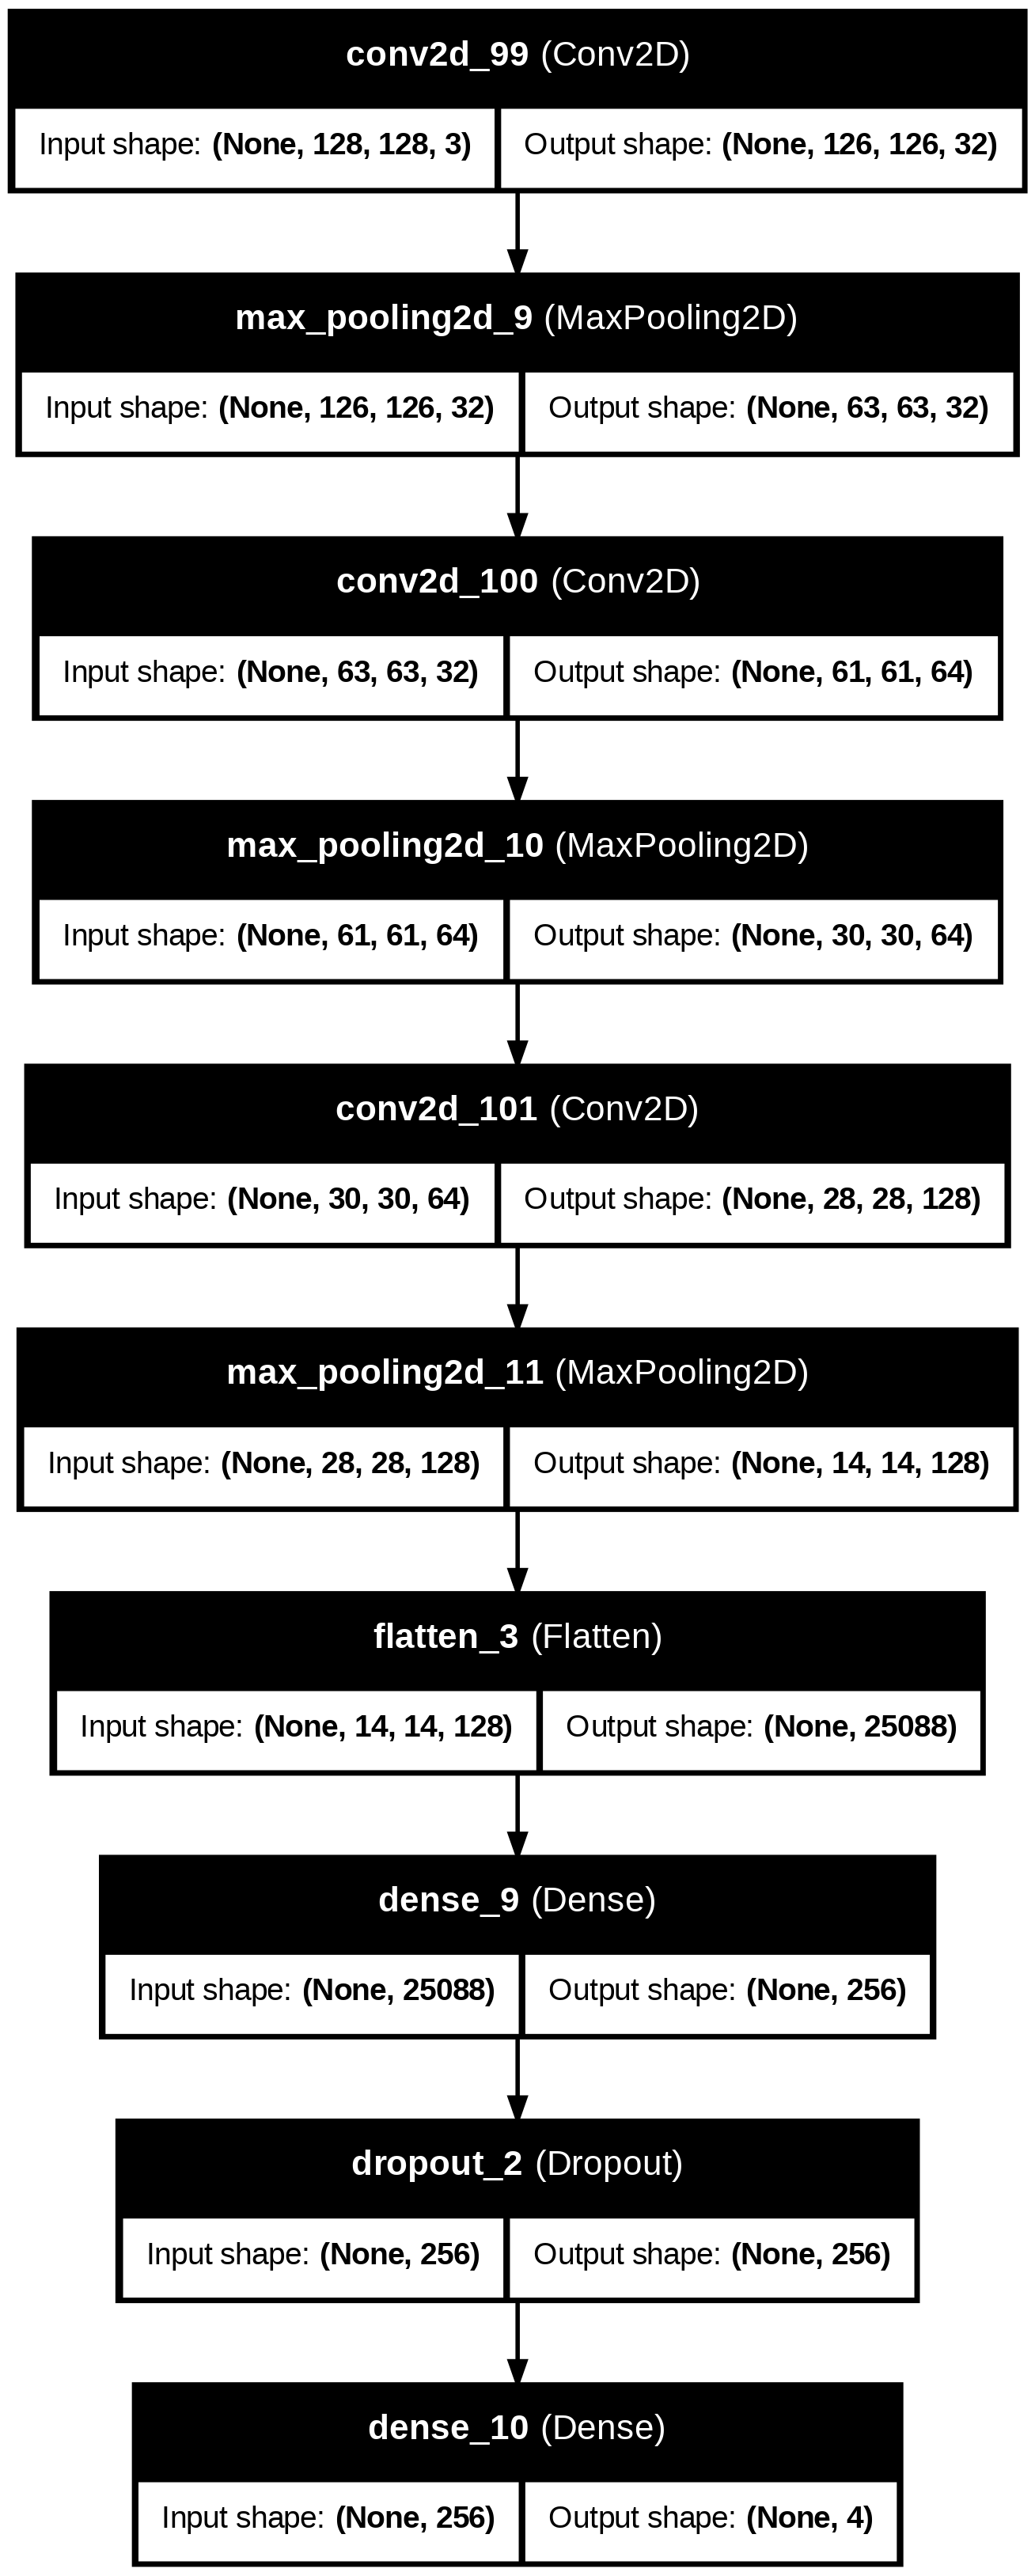

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Define Basic CNN Model
basic_cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Save Architecture Diagram
plot_model(basic_cnn_model, to_file='Basic_CNN_Model.png', show_shapes=True, show_layer_names=True)


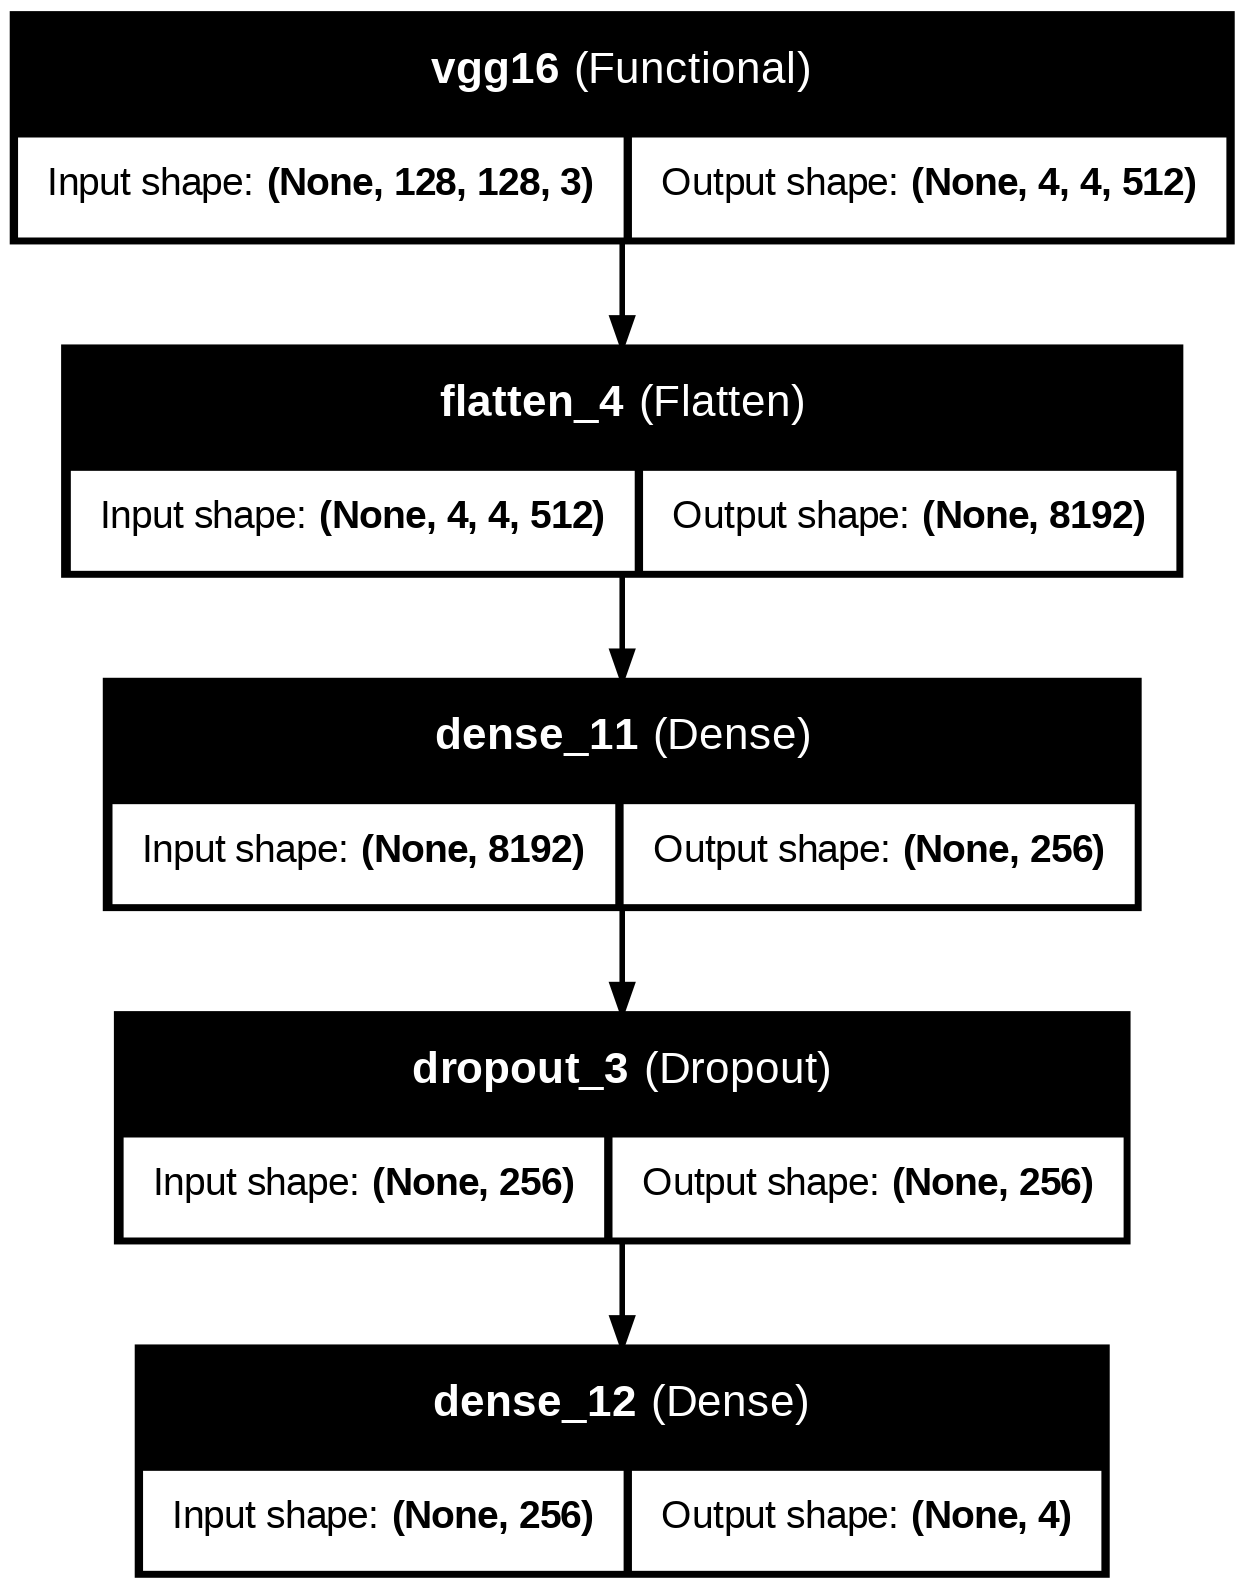

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Define Transfer Learning Model with VGG16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
transfer_learning_model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Save Architecture Diagram
plot_model(transfer_learning_model, to_file='Transfer_Learning_VGG16_Model.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Install necessary libraries
!pip install tensorflow keras


In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
# Example of expected dataset directory structure
# /content/chest_ct_scan_dataset/
#     train/
#         adenocarcinoma/
#         squamous_cell_carcinoma/
#         large_cell_carcinoma/
#         normal/
#     validation/
#         adenocarcinoma/
#         squamous_cell_carcinoma/
#         large_cell_carcinoma/
#         normal/


In [ ]:
import os

base_dir = '/content/chest_ct_scan_dataset'
print("Directory exists:", os.path.exists(base_dir))
print("Contents of base_dir:", os.listdir(base_dir) if os.path.exists(base_dir) else "Not Found")


Directory exists: True
Contents of base_dir: ['Data']


In [ ]:
import zipfile

zip_path = '/content/Chest CT-Scan images Dataset.zip'  # Update with your actual zip file path
extract_dir = '/content/chest_ct_scan_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted to:", extract_dir)


Dataset extracted to: /content/chest_ct_scan_dataset


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

print("Train Directory Exists:", os.path.exists(train_dir))
print("Validation Directory Exists:", os.path.exists(val_dir))


Train Directory Exists: False
Validation Directory Exists: False


In [ ]:
import os

base_dir = '/content/chest_ct_scan_dataset'
print("Base directory exists:", os.path.exists(base_dir))
if os.path.exists(base_dir):
    print("Contents of base_dir:", os.listdir(base_dir))
else:
    print("Base directory not found. Ensure dataset is extracted.")


Base directory exists: True
Contents of base_dir: ['Data']


In [ ]:
import zipfile

zip_path = '/content/Chest CT-Scan images Dataset.zip'  # Update with your dataset ZIP path
extract_dir = '/content/chest_ct_scan_dataset'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted to:", extract_dir)


Dataset extracted to: /content/chest_ct_scan_dataset


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))


Train directory exists: False
Validation directory exists: False


In [ ]:
# Correct path based on actual structure
train_dir = '/content/chest_ct_scan_dataset/<actual_train_folder_name>'
val_dir = '/content/chest_ct_scan_dataset/<actual_validation_folder_name>'

print("Updated Train Directory Exists:", os.path.exists(train_dir))
print("Updated Validation Directory Exists:", os.path.exists(val_dir))


Updated Train Directory Exists: False
Updated Validation Directory Exists: False


In [ ]:
import os

base_dir = '/content/chest_ct_scan_dataset'
print("Base directory exists:", os.path.exists(base_dir))

if os.path.exists(base_dir):
    print("Contents of base directory:", os.listdir(base_dir))
else:
    print("Base directory not found. Please check the dataset extraction path.")


Base directory exists: True
Contents of base directory: ['Data']


In [ ]:
train_dir = os.path.join(base_dir, 'train')


In [ ]:
train_dir = os.path.join(base_dir, 'training_set')


In [ ]:
train_dir = '/content/chest_ct_scan_dataset/Data/train'  # Replace 'train' if folder name differs
val_dir = '/content/chest_ct_scan_dataset/Data/valid'  # Replace 'validation' if folder name differs

print("Train directory:", os.listdir(train_dir))
print("Validation directory:", os.listdir(val_dir))


Train directory: ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']
Validation directory: ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']


In [ ]:
import os

train_dir = '/content/chest_ct_scan_dataset/Data/train'
val_dir = '/content/chest_ct_scan_dataset/Data/valid'

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))

# List contents to confirm structure
print("Classes in train directory:", os.listdir(train_dir))
print("Classes in validation directory:", os.listdir(val_dir))


Train directory exists: True
Validation directory exists: True
Classes in train directory: ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']
Classes in validation directory: ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)  # ResNet50 input size
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,         # Normalize pixel values
    rotation_range=20,         # Rotate images randomly
    width_shift_range=0.2,     # Shift horizontally
    height_shift_range=0.2,    # Shift vertically
    shear_range=0.2,           # Shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True       # Flip images horizontally
)

# Validation data preprocessing
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dense(128, activation='relu')(x)  # Another fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping]
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.3239 - loss: 1.3778 - val_accuracy: 0.4167 - val_loss: 1.3038
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step - accuracy: 0.4078 - loss: 1.2781 - val_accuracy: 0.3750 - val_loss: 1.2774
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.5121 - loss: 1.2159 - val_accuracy: 0.4861 - val_loss: 1.1864
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 133s 6s/step - accuracy: 0.5087 - loss: 1.1634 - val_accuracy: 0.4583 - val_loss: 1.1362
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 132s 6s/step - accuracy: 0.4825 - loss: 1.1211 - val_accuracy: 0.4444 - val_loss: 1.1035
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.5513 - loss: 1.0940 - val_accuracy: 0.4861 - val_loss: 1.0928
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.5026 - loss: 1.0585 - val_accuracy: 0.4861 - val_loss: 1.0754
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.5546 - loss: 1.0308 - val_accuracy: 0.4861 - v

3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.2057 - loss: 1.6251
Validation Loss: 1.6171019077301025
Validation Accuracy: 0.2083333283662796


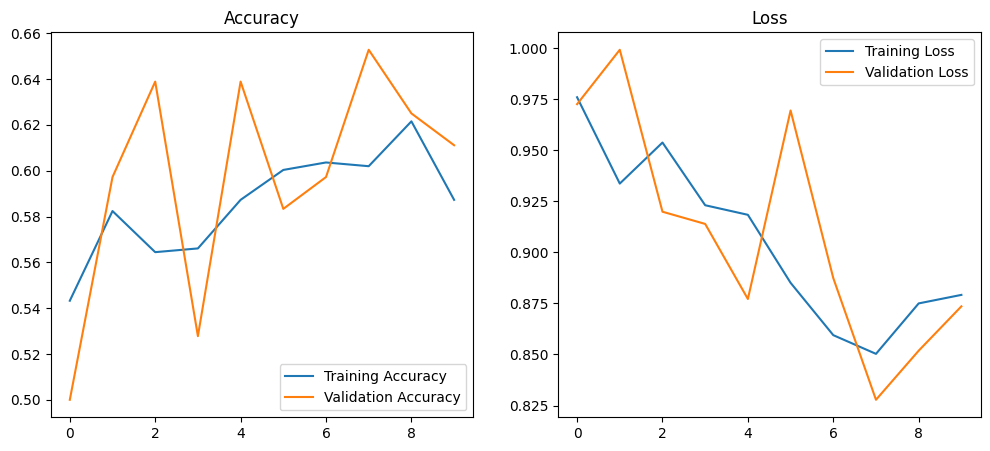

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.00      0.00      0.00        23
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.00      0.00      0.00        21
                                          normal       0.00      0.00      0.00        13
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.21      1.00      0.34        15

                                        accuracy                           0.21        72
                                       macro avg       0.05      0.25      0.09        72
                                    weighted avg       0.04      0.21      0.07        72

Confusion Matrix:
[[ 0  0  0 23]
 [ 0  0  0 21]
 [ 0  0  0 13]
 [ 0  0  0 15]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Predict classes
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

# Classification report
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


In [ ]:
# Unfreeze some layers in the base model
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze the first 100 layers, adjust as needed
    layer.trainable = False

# Compile with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],   # New augmentations for brightness
    channel_shift_range=30.0       # Random contrast adjustment
)


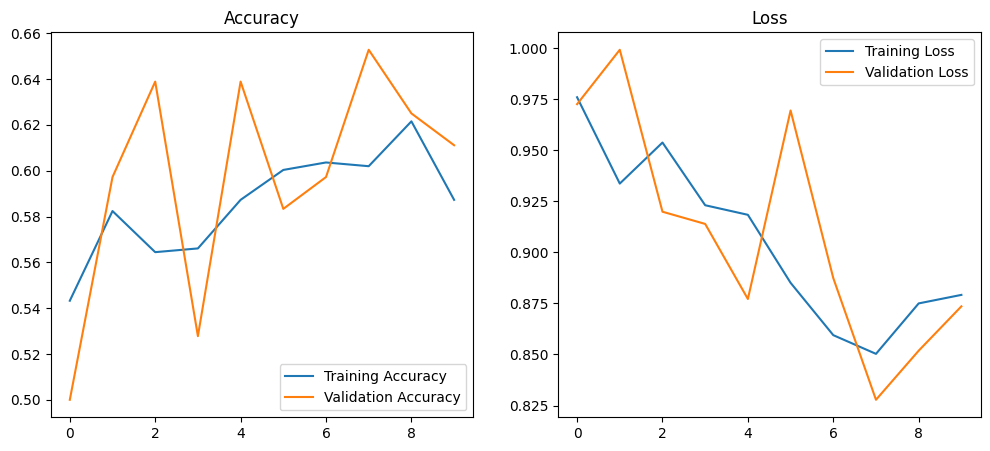

In [ ]:
# Plot training history again to visualize the impact of changes
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict classes
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

# Classification report
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.3546 - loss: 1.0078
Validation Loss: 0.9851548075675964
Validation Accuracy: 0.3888888955116272


2/3 ━━━━━━━━━━━━━━━━━━━━ 4s 5s/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.31      0.48      0.37        23
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.38      0.43      0.40        21
                                          normal       0.17      0.15      0.16        13
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.00      0.00      0.00        15

                                        accuracy                           0.31        72
                                       macro avg       0.21      0.27      0.23        72
                                    weighted avg       0.24      0.31      0.26        72

Confusion Matrix:
[[11  9  3  0]
 [ 8  9  4  0]
 [ 8  3  2  0]
 [ 9  3  3  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Unfreeze more layers if needed
base_model.trainable = True
for layer in base_model.layers[:50]:  # Freeze only the first 50 layers this time
    layer.trainable = False


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications import InceptionV3

# Example of using InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Follow similar steps as with ResNet to add custom layers, compile, and train


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation for training set with added brightness and contrast adjustments
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],   # Brightness adjustment
    channel_shift_range=30.0       # Contrast adjustment
)

# Validation data without augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [ ]:
# Define class weights based on class distribution
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert class weights into dictionary format for Keras
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)


Class Weights: {0: 0.7858974358974359, 1: 1.3326086956521739, 2: 1.035472972972973, 3: 0.9887096774193549}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Re-compile model with lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with class weights
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict,  # Apply class weights
    callbacks=[early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 269s 12s/step - accuracy: 0.2837 - loss: 3.3660 - val_accuracy: 0.4861 - val_loss: 1.0260
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 240s 12s/step - accuracy: 0.4671 - loss: 1.1713 - val_accuracy: 0.4861 - val_loss: 1.1404
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 241s 12s/step - accuracy: 0.4809 - loss: 1.0414 - val_accuracy: 0.2222 - val_loss: 1.3555
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 242s 12s/step - accuracy: 0.4777 - loss: 1.0562 - val_accuracy: 0.1806 - val_loss: 1.6382
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 243s 12s/step - accuracy: 0.5107 - loss: 1.0140 - val_accuracy: 0.1806 - val_loss: 1.8674
Epoch 6/20
11/20 ━━━━━━━━━━━━━━━━━━━━ 1:37 11s/step - accuracy: 0.5685 - loss: 0.9982

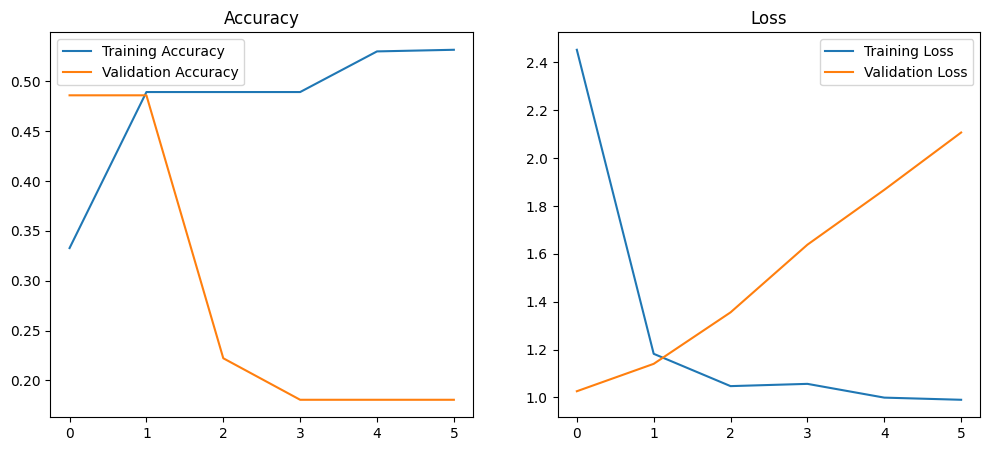

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.4696 - loss: 1.0243
Validation Loss: 1.0259615182876587
Validation Accuracy: 0.4861111044883728
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.32      0.83      0.46        23
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.00      0.00      0.00        21
                                          normal       0.08      0.08      0.08        13
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.00      0.00      0.00        15

                                        accuracy                           0.28        72
                                       macro avg       0.10      0.23      0.13        72
                                    weighted avg       0.12      0.28      0.16        72

Confusion Matrix:
[[19  0  4  0]
 [19  0  2  0]
 [12  0  1  0]
 [10  0  5  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Plot training history to visualize the impact of changes
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Evaluate the model and display classification report and confusion matrix
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict classes
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load InceptionV3 model without top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train with class weights and early stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.1898 - loss: 1.5618 - val_accuracy: 0.0972 - val_loss: 1.5095
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.2063 - loss: 1.5041 - val_accuracy: 0.1806 - val_loss: 1.4572
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.2602 - loss: 1.4427 - val_accuracy: 0.2222 - val_loss: 1.4316
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.2854 - loss: 1.3652 - val_accuracy: 0.2083 - val_loss: 1.4048
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.3153 - loss: 1.3533 - val_accuracy: 0.2500 - val_loss: 1.3858


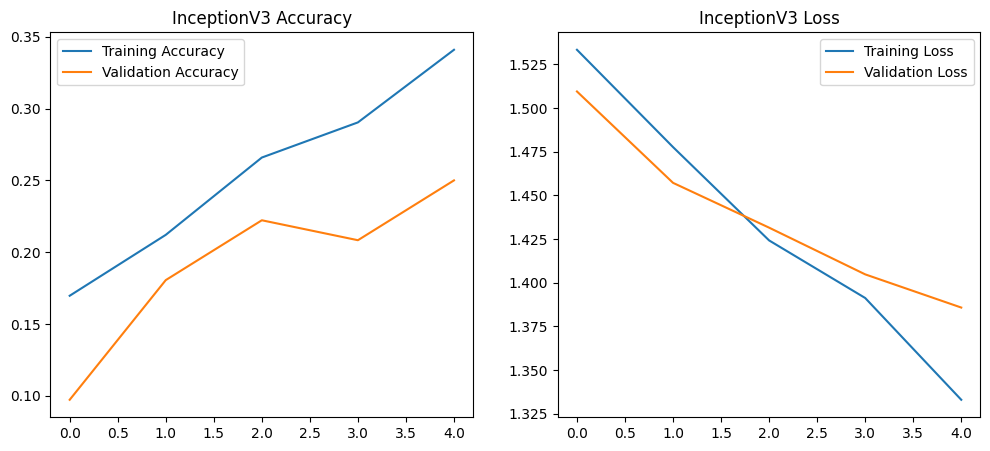

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1072 - loss: 1.5021
Validation Loss: 1.5095250606536865
Validation Accuracy: 0.0972222238779068
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.30      0.30      0.30        23
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.17      0.10      0.12        21
                                          normal       0.13      0.31      0.18        13
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.00      0.00      0.00        15

                                        accuracy                           0.18        72
                                       macro avg       0.15      0.18      0.15        72
                                    weighted avg       0.17      0.18      0.17        72

Confusion Matrix:
[[ 7  3 12  1]
 [ 8  2  9  2]
 [ 4  2  4  3]
 [ 4  5  6  0]]


In [ ]:
# Evaluate the model and visualize training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('InceptionV3 Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('InceptionV3 Loss')

plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict classes and display classification report
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


In [ ]:
# Unfreeze the last few layers of InceptionV3
base_model.trainable = True
for layer in base_model.layers[:249]:  # Adjust the number to unfreeze more or fewer layers
    layer.trainable = False

# Re-compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-6),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model again with early stopping
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.2575 - loss: 1.4058 - val_accuracy: 0.1111 - val_loss: 1.4668
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.2533 - loss: 1.3800 - val_accuracy: 0.1806 - val_loss: 1.4435
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.2561 - loss: 1.4007 - val_accuracy: 0.2083 - val_loss: 1.4258
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.2666 - loss: 1.3919 - val_accuracy: 0.2639 - val_loss: 1.4076
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - accuracy: 0.2862 - loss: 1.3529 - val_accuracy: 0.2778 - val_loss: 1.3934


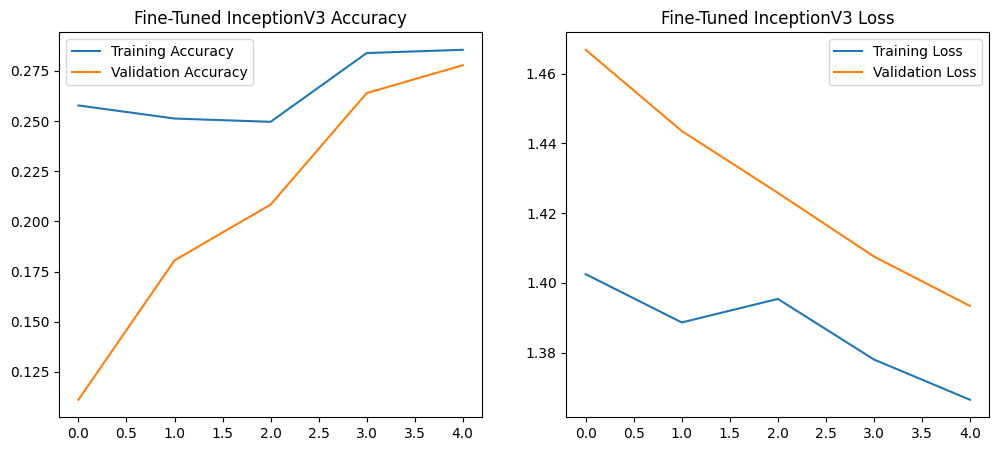

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.1181 - loss: 1.4756
Validation Loss: 1.4668090343475342
Validation Accuracy: 0.1111111119389534
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.39      0.48      0.43        23
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.14      0.10      0.11        21
                                          normal       0.14      0.23      0.18        13
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.11      0.07      0.08        15

                                        accuracy                           0.24        72
                                       macro avg       0.20      0.22      0.20        72
                                    weighted avg       0.22      0.24      0.22        72

Confusion Matrix:
[[11  4  6  2]
 [ 7  2  9  3]
 [ 4  3  3  3]
 [ 6  5  3  1]]


In [ ]:
# Plot training history to visualize the impact of changes
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Fine-Tuned InceptionV3 Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Fine-Tuned InceptionV3 Loss')

plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict classes and display classification report
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load EfficientNetB0 without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train EfficientNet model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.3265 - loss: 1.3818 - val_accuracy: 0.3194 - val_loss: 1.3849
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.3151 - loss: 1.3788 - val_accuracy: 0.3194 - val_loss: 1.3845
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.3327 - loss: 1.3865 - val_accuracy: 0.3194 - val_loss: 1.3845
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.3356 - loss: 1.3822 - val_accuracy: 0.3194 - val_loss: 1.3846
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.2691 - loss: 1.3933 - val_accuracy: 0.3194 - val_loss: 1.3846


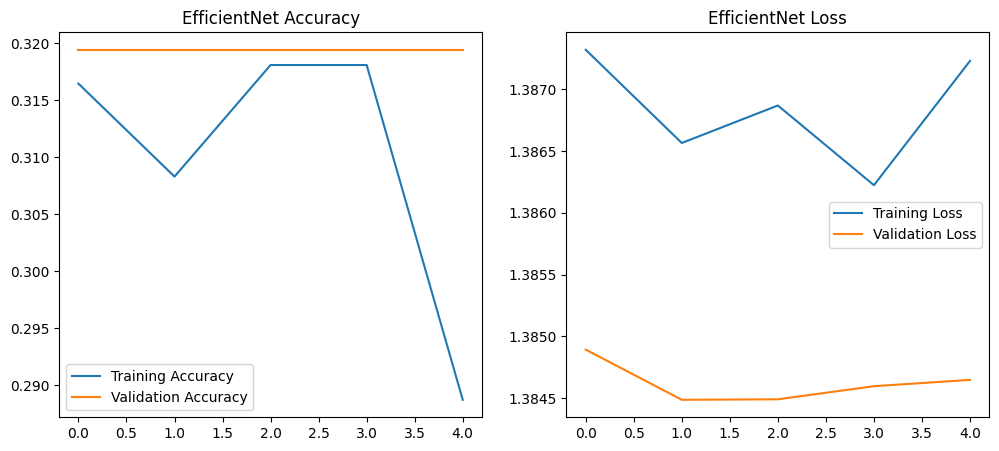

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3316 - loss: 1.3848
Validation Loss: 1.3848919868469238
Validation Accuracy: 0.3194444477558136
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.32      1.00      0.48        23
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.00      0.00      0.00        21
                                          normal       0.00      0.00      0.00        13
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.00      0.00      0.00        15

                                        accuracy                           0.32        72
                                       macro avg       0.08      0.25      0.12        72
                                    weighted avg       0.10      0.32      0.15        72

Confusion Matrix:
[[23  0  0  0]
 [21  0  0  0]
 [13  0  0  0]
 [15  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('EfficientNet Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('EfficientNet Loss')

plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict classes and display classification report and confusion matrix
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
